# Machine Learning Project - Group 5

## Instruction

**The Whole project will take more than 1 hour to run because of selecting best features and parameters for models.**

Dataset: run file `final_project_database.py` to get `final_merged_data_with_income.csv`.\

Data and models processing, model evaluation: run blocks below in order.\

Ablation study: run file `model_evaluation_and_ablation_study.py`\

You will need to import the following:\
`pip install yfinance`\
`pip install alpha_vantage`\
`pip install fredapi`\
`pip install requests`\
`pip install pandas`\
`pip install pandas_ta`

In [20]:
# import libraries
import pandas as pd
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import matplotlib.dates as mdates
from sklearn.feature_selection import RFE
import datetime as dt



## Data Understanding & Preprocessing

In [2]:
# Import CSV file using Pandas
df = pd.read_csv('final_merged_data_with_income.csv')

In [3]:
print(pd.DataFrame(df).head())

         Date  Actual_Close  Target      Close       High        Low   
0  04/02/1996     40.391197     1.0  40.314198  40.323824  39.919527  \
1  04/03/1996     40.391197     0.0  40.391197  40.391197  40.227553   
2  04/04/1996     40.362320     0.0  40.391197  40.420076  40.150544   
3  04/08/1996     39.669231     0.0  40.362320  40.487460  40.352694   
4  04/09/1996     39.515224     0.0  39.669231  39.669231  39.178299   

        Open     Volume  RSI  MACD_Fast  ...  depreciation   
0  40.044666   773400.0  0.0        0.0  ...           0.0  \
1  40.362319   638800.0  0.0        0.0  ...           0.0   
2  40.246805   288000.0  0.0        0.0  ...           0.0   
3  40.391198   934900.0  0.0        0.0  ...           0.0   
4  39.351570  2217200.0  0.0        0.0  ...           0.0   

   depreciationAndAmortization  incomeBeforeTax  incomeTaxExpense   
0                          0.0              0.0               0.0  \
1                          0.0              0.0         

In [4]:
print(df.shape)
df.describe()

(6857, 63)


,Actual_Close,Target,Close,High,Low,Open,Volume,RSI,MACD_Fast,MACD_Signal,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
count,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6857.000000,6.857000e+03,6857.000000,6857.000000,6857.000000,...,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03
mean,150.802146,0.539595,150.744133,151.649361,149.729350,150.733627,9.441924e+07,54.469019,0.392762,0.389388,...,1.327846e+07,8.900394e+07,4.162743e+08,7.708604e+07,4.702282e+07,4.058070e+08,3.305703e+08,4.665160e+08,4.528375e+08,3.391714e+08
std,106.307228,0.498466,106.258948,106.829779,105.587463,106.228035,9.352733e+07,11.530406,2.087153,1.942091,...,4.447126e+07,2.518683e+08,9.782264e+08,1.851928e+08,1.391617e+08,1.176321e+09,7.896427e+08,1.090770e+09,1.203299e+09,8.016867e+08
min,38.764378,0.000000,38.764378,39.101292,37.392415,38.360127,1.844000e+05,0.000000,-22.317060,-18.677592,...,0.000000e+00,-1.676750e+09,-7.250000e+08,-1.053000e+09,0.000000e+00,-1.904000e+09,-1.904000e+09,-5.680000e+08,-2.090000e+08,-8.240000e+08
25%,78.792763,0.000000,78.758270,79.225390,78.344480,78.799285,3.251380e+07,46.394926,-0.317851,-0.280026,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,99.913498,1.000000,99.895508,100.681871,99.189624,100.000721,7.085740e+07,55.410633,0.476517,0.455406,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,191.220566,1.000000,191.149857,191.874879,190.212618,191.255922,1.267687e+08,63.012673,1.196594,1.141178,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,466.563293,1.000000,466.563293,468.780396,464.951792,468.038120,8.710263e+08,87.191899,9.243734,8.199310,...,4.440000e+08,1.321333e+09,5.149000e+09,1.094667e+09,1.175000e+09,1.472111e+10,3.880915e+09,5.389000e+09,5.753787e+09,4.261000e+09


In [5]:
# Extract data from the DataFrame
y = df['Target']
x1 = df['Actual_Close']
down_counts = df[df['Target'] == 0]
up_counts = df[df['Target'] == 1]
x2 = df['Volume']

print("Number of Days Price Go Down:")
print(down_counts.shape[0])
print("Number of Days Price Go Up:")
print(up_counts.shape[0])

Number of Days Price Go Down:
3157
Number of Days Price Go Up:
3700


In [6]:
# Create predictor variables
df['Open-Close'] = df['Open'].shift(+1) - df['Close'].shift(+1)
df['High-Low'] = df['High'].shift(+1) - df['Low'].shift(+1)
df['Crude_Oil_Change'] = df['Crude_Oil_WTI'].shift(+1) - df['Crude_Oil_WTI']
df['Volume_Change_Percentage']=df['Volume'].shift(+1) / df['Volume']

df = df.dropna(subset=['Open-Close','High-Low','Crude_Oil_Change','Volume_Change_Percentage'])

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low','Crude_Oil_Change','Volume_Change_Percentage']]
print(X)

df_up = df[df['Target'] == 1]
df_down = df[df['Target'] == 0]

      Open-Close  High-Low  Crude_Oil_Change  Volume_Change_Percentage
1      -0.269531  0.404297          0.000000                  1.210708
2      -0.028878  0.163644          0.000000                  2.218056
3      -0.144392  0.269531          0.000000                  0.308054
4       0.028878  0.134766          0.000000                  0.421658
5      -0.317662  0.490932          0.000000                  1.877551
...          ...       ...               ...                       ...
6852    1.220001  2.660004          0.349998                  1.089827
6853   -2.559998  3.019989         -0.209999                  0.767174
6854   -0.279999  2.589996          1.670006                  1.264350
6855    1.179993  3.419983         -1.860001                  1.000136
6856   -3.820007  4.929993         -0.300003                  0.962686

[6856 rows x 4 columns]


## Visualization

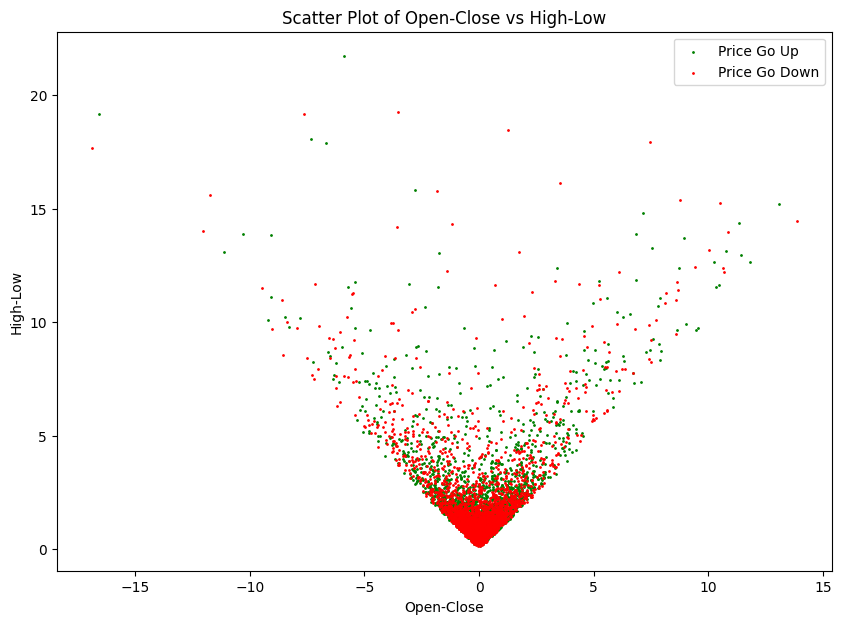

In [7]:
# Plotting a scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(df_up['Open-Close'], df_up['High-Low'], c='green',s=1,label='Price Go Up')
plt.scatter(df_down['Open-Close'], df_down['High-Low'], c='red',s=1,label='Price Go Down')

# Add label and title
plt.xlabel('Open-Close')
plt.ylabel('High-Low')
plt.title('Scatter Plot of Open-Close vs High-Low')
plt.legend()
plt.show()


## Model Training & Validation

## 1. Support Vector Machine

- Data Preprocessing

In [8]:
# Features list
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 
            'MACD_Fast', 'MACD_Signal', 'SMA', 'WEI', 'VIX', 'FFR', 
            'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year', 'Recession Prob', 
            'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper', 'Wheat', 'Natural_Gas', 
            'Corn', 'Cotton', 'Coffee', 'Sugar', 'Weekly Mean', 'Quarterly Mean', 
            'Annual Mean', 'Annual Weekly Mean', 'Annual Quarterly Mean', 'Weekly Trend', 
            'Daily Range', 'Daily Volatility', 'grossProfit', 'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold', 
            'operatingIncome', 'sellingGeneralAndAdministrative', 'researchAndDevelopment', 
            'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome', 'interestIncome', 
            'interestExpense', 'nonInterestIncome', 'otherNonOperatingIncome', 'depreciation', 
            'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense', 'interestAndDebtExpense', 
            'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome']

num_features = 15

In [9]:
y=df['Target']
X = df[features]

# Remove constant features
X = VarianceThreshold().fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Define pipeline steps
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select_k_best', SelectKBest(score_func=mutual_info_classif, k=num_features)),
    ('svc', SVC())
])

# Define search space
param_distributions = {
    'select_k_best__k': np.arange(5, X_scaled.shape[1]), # Updating the range based on the number of non-constant features
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'sigmoid', 'poly']
}

# Create randomized search object
best_svm = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=35, cv=5, verbose=1, random_state=42)

# Fit to the data
best_svm.fit(X_scaled, y)

# Get the best parameters and features
best_params = best_svm.best_params_
best_features = np.array(features)[best_svm.best_estimator_.named_steps['select_k_best'].get_support()]

print("Best Parameters:", best_params)
print("Best Features:", best_features)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


Best Parameters: {'svc__kernel': 'linear', 'svc__C': 1, 'select_k_best__k': 17}
Best Features: ['Open' 'FFR' 'UNEMPLOYMENT' 'Crude_Oil_WTI' 'Wheat' 'Cotton' 'Sugar'
 'Weekly Mean' 'Annual Mean' 'Annual Weekly Mean' 'grossProfit'
 'investmentIncomeNet' 'interestIncome' 'nonInterestIncome'
 'incomeBeforeTax' 'interestAndDebtExpense' 'ebitda']


In [11]:
X = df[best_features]

print(X.shape)

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to tune and use GridSearchCV to find the best ones for SVC model.
grid_clf = SVC(C=best_params['svc__C'], kernel=best_params['svc__kernel'])
grid_clf.fit(X_train_scaled, y_train)

(6856, 17)


SVC(C=1, kernel='linear')

- Cross-Validation

In [12]:
# Evaluate the model using cross-validation
cross_val_accuracy = cross_val_score(grid_clf, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_accuracy)
print("Mean Cross-Validation Accuracy Score:", cross_val_accuracy.mean())
print("Cross-Validation Accuracy Variance:", cross_val_accuracy.var())

Cross-Validation Accuracy Scores: [0.53646677 0.53727715 0.53079417 0.54132901 0.53889789]
Mean Cross-Validation Accuracy Score: 0.5369529983792545
Cross-Validation Accuracy Variance: 1.2240963095860405e-05


- Evaluation<br>
Precision, Recall, and F1-Score

In [13]:

# Predicting the test set results
y_pred = grid_clf.predict(X_test_scaled)

# Generating and printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       301
         1.0       0.56      1.00      0.72       385

    accuracy                           0.56       686
   macro avg       0.78      0.50      0.36       686
weighted avg       0.75      0.56      0.41       686



Confusion Matrix

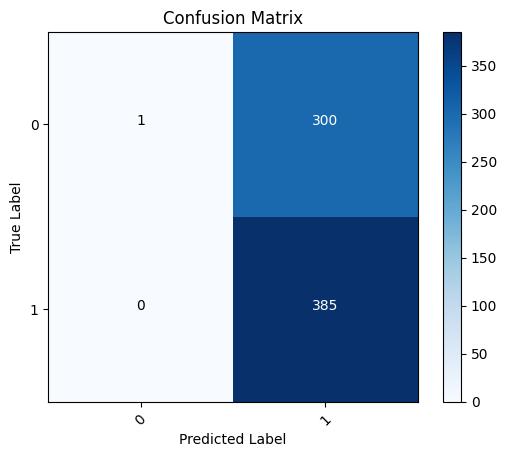

In [14]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Annotate the plot with the actual numbers
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

ROC-AUC Curve

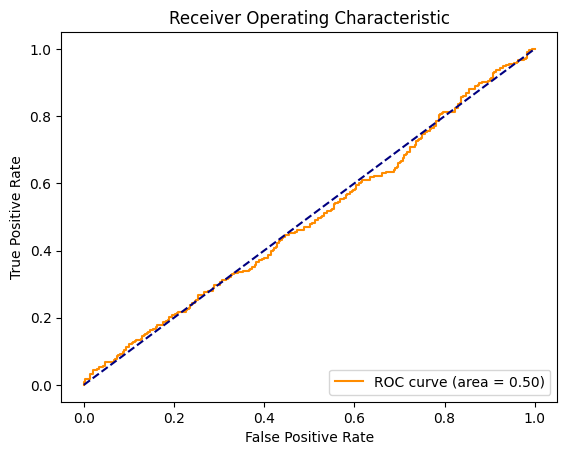

In [15]:
# Compute the probabilities of the positive class
y_prob = grid_clf.decision_function(X_test_scaled)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 2. Logistic Regression Model

In [24]:
y = df['Target']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X1 = df[['Weekly Mean', 'Quarterly Mean','Annual Mean','Annual Weekly Mean','Annual Quarterly Mean']]


In [25]:
# Create predictor variables
df['Weekly Mean'] = df['Weekly Mean'].shift(+1)
df['Quarterly Mean'] = df['Quarterly Mean'].shift(+1)
df['Annual Mean'] = df['Annual Mean'].shift(+1)
df['Annual Weekly Mean'] = df['Annual Weekly Mean'].shift(+1)
df['Annual Quarterly Mean'] = df['Annual Quarterly Mean'].shift(+1)

df = df.dropna(subset=['Weekly Mean', 'Quarterly Mean','Annual Mean','Annual Weekly Mean','Annual Quarterly Mean'])
# Store all predictor variables in a variable X
X = df[['Weekly Mean', 'Quarterly Mean','Annual Mean','Annual Weekly Mean','Annual Quarterly Mean']]
df_up = df[df['Target'] == 1]
df_down = df[df['Target'] == 0]


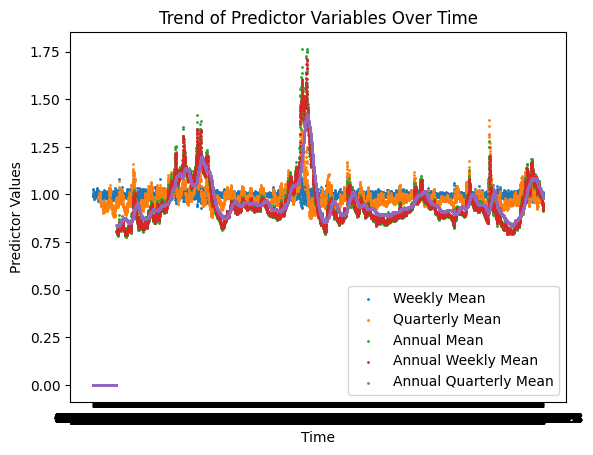

In [18]:
time_column = 'Date'
# Plot each predictor variable against time using a scatter plot
for column in X.columns:
    plt.scatter(df[time_column], X[column], s=1,label=column)

# Label the axes and add a title
plt.xlabel('Time')
plt.ylabel('Predictor Values')
plt.title('Trend of Predictor Variables Over Time')

# Add a legend to distinguish between the predictor variables
plt.legend()

# Display the plot
plt.show()

In [27]:
# Create the logistic regression model
logistic_reg_best = LogisticRegression(max_iter=10000)

# Use RFE to find top 10 features
rfe = RFE(logistic_reg_best, n_features_to_select=10)  # Select the top 10 features
rfe.fit(X_scaled, y)
selected_features = np.array(features)[rfe.get_support(indices=True).tolist()]  # Get the selected features

# Print the selected features
print("Selected features after RFE:", selected_features)

Selected features after RFE: ['Close' 'Volume' 'SMA' 'VIX' 'UNEMPLOYMENT' 'Crude_Oil_WTI' 'Gold'
 'Annual Mean' 'Annual Weekly Mean' 'Annual Quarterly Mean']


In [28]:
X = df[selected_features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
logistic_reg_best = LogisticRegression()

# Train the model on the training data
logistic_reg_best.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logistic_reg_best.predict(X_test_scaled)

- Cross-Validation

In [29]:
# Evaluate the model using cross-validataion
cross_val_accuracy = cross_val_score(logistic_reg_best, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_accuracy)
print("Mean Cross-Validation Accuracy Score:", cross_val_accuracy.mean())
print("Cross-Validation Accuracy Variance:", cross_val_accuracy.var())

Cross-Validation Accuracy Scores: [0.58427877 0.58184765 0.59042985 0.58556367 0.58069749]
Mean Cross-Validation Accuracy Score: 0.584563483143852
Cross-Validation Accuracy Variance: 1.1563465117700059e-05


- Evaluation<br>
Precision, Recall, and F1-Score

In [30]:
# Predicting the test set results
y_pred = logistic_reg_best.predict(X_test_scaled)

# Generating and printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.59      0.35      0.44       326
         1.0       0.57      0.78      0.66       360

    accuracy                           0.57       686
   macro avg       0.58      0.56      0.55       686
weighted avg       0.58      0.57      0.55       686



Confusion Matrix

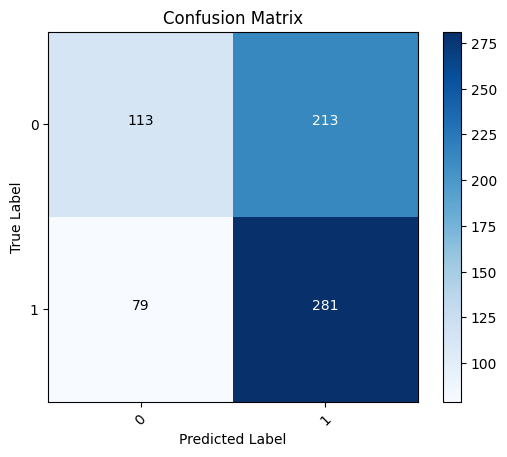

In [31]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

ROC-AUC Curve

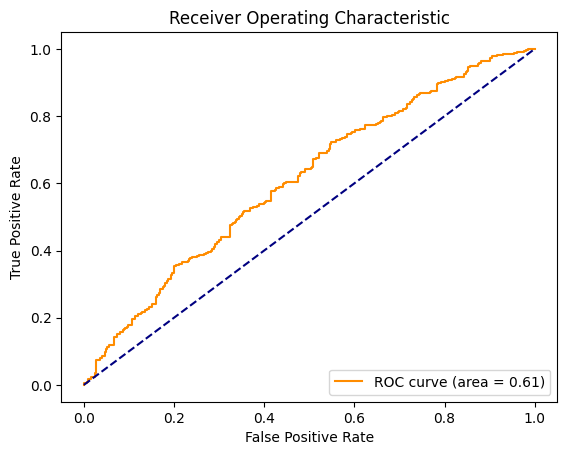

In [32]:
# Compute the probabilities of the positive class
y_prob = logistic_reg_best.decision_function(X_test_scaled)

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 3. Random Forest Decision Tree

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Read data
data = pd.read_csv('final_merged_data_with_income.csv')

# Import all features into feature columns
feature_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'MACD_Fast', 'MACD_Signal',
                    'SMA', 'WEI', 'VIX', 'FFR', 'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year', 
                    'Recession Prob', 'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper', 'Wheat', 'Natural_Gas', 
                    'Corn', 'Cotton', 'Coffee', 'Sugar', 'Weekly Mean', 'Quarterly Mean', 'Annual Mean', 
                    'Annual Weekly Mean', 'Annual Quarterly Mean', 'Weekly Trend', 'Daily Range', 'Daily Volatility', 
                    'Mean Reported EPS', 'Mean Estimated EPS', 'grossProfit', 'totalRevenue', 'costOfRevenue',
                    'costofGoodsAndServicesSold', 'operatingIncome', 'sellingGeneralAndAdministrative', 
                    'researchAndDevelopment', 'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome', 
                    'interestIncome', 'interestExpense', 'nonInterestIncome', 'otherNonOperatingIncome', 
                    'depreciation', 'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense', 
                    'interestAndDebtExpense', 'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax', 
                    'ebit', 'ebitda', 'netIncome'
                    ]


# use target column
target_column = ['Target']

# X should be all features
X = data[feature_columns]

# Y should be target
y = data[target_column].values.ravel()

In [34]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('select_k_best', SelectKBest(score_func=mutual_info_classif)),
    ('rf', RandomForestClassifier())
])

# Create parameters
parameters = {
    'select_k_best__k': np.arange(1, X.shape[1]),  
    'rf__n_estimators': [50, 250, 400, 500, 650, 750, 900, 1200, 1500, 2000, 2500, 3000],
    'rf__criterion': ['gini', 'entropy'],
    'rf__max_depth': [None, 1, 7, 10, 20, 70, 80, 150],
    'rf__min_samples_split': [7, 10, 12, 15, 18, 21, 25, 30, 35, 40, 45, 50],
    'rf__min_samples_leaf': [1, 2, 3, 4, 6, 8, 10, 12, 15, 20, 25],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False],
    'rf__random_state': [0, 42]
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Use RandomizedSearchCV for best parameters
random_search = RandomizedSearchCV(pipeline, parameters, n_iter=25, cv=5, scoring='accuracy', random_state=42, error_score='raise')
random_search.fit(X_train, y_train)

# Get best parameters and best estimator
best_params = random_search.best_params_
best_rft = random_search.best_estimator_

# Fit best estimator on training data
best_rft.fit(X_train, y_train)

# Get the selected features
selected_features_indices = best_rft.named_steps['select_k_best'].get_support()
best_features = X.columns[selected_features_indices]
predictions = best_rft.predict(X_test)

# Print the following report
print("Best parameters:", best_params)
print("Best features:", best_features)

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://stackoverflow.com/questions/73057318/get-support-of-the-features-selected-in-gridsearch-cv
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Best parameters: {'select_k_best__k': 58, 'rf__random_state': 0, 'rf__n_estimators': 250, 'rf__min_samples_split': 12, 'rf__min_samples_leaf': 2, 'rf__max_features': 'log2', 'rf__max_depth': 70, 'rf__criterion': 'entropy', 'rf__bootstrap': False}
Best features: Index(['Close', 'High', 'Open', 'Volume', 'MACD_Fast', 'MACD_Signal', 'SMA',
       'WEI', 'VIX', 'FFR', 'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year',
       'Recession Prob', 'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper', 'Wheat',
       'Natural_Gas', 'Corn', 'Cotton', 'Coffee', 'Sugar', 'Weekly Mean',
       'Quarterly Mean', 'Annual Mean', 'Annual Weekly Mean',
       'Annual Quarterly Mean', 'Weekly Trend', 'Daily Range',
       'Daily Volatility', 'Mean Reported EPS', 'Mean Estimated EPS',
       'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterest

- Cross-Validation

In [35]:
# Evaluate the model using cross-validation
cross_val_accuracy = cross_val_score(best_rft, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_accuracy)
print("Mean Cross-Validation Accuracy Score:", cross_val_accuracy.mean())
print("Cross-Validation Accuracy Variance:", cross_val_accuracy.var())

Cross-Validation Accuracy Scores: [0.62186235 0.59886548 0.61345219 0.6102107  0.59319287]
Mean Cross-Validation Accuracy Score: 0.6075167159889501
Cross-Validation Accuracy Variance: 0.00010566020830000129


- Evaluation<br>
Precision, Recall, and F1-Score

In [36]:
# Make predictions on the test data
y_pred = best_rft.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.63      0.57      0.60       317
         1.0       0.66      0.71      0.68       369

    accuracy                           0.65       686
   macro avg       0.64      0.64      0.64       686
weighted avg       0.64      0.65      0.64       686



Confusion Matrix

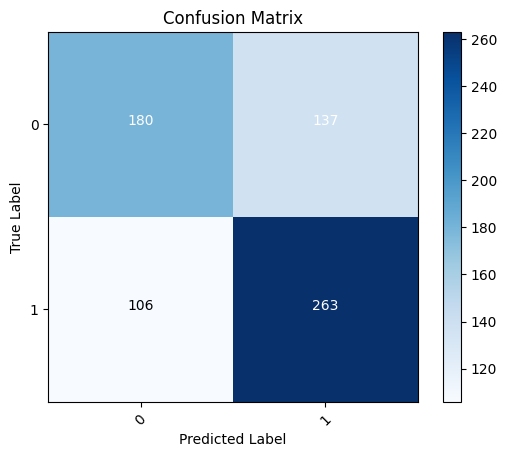

In [37]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

ROC-AUC Curve

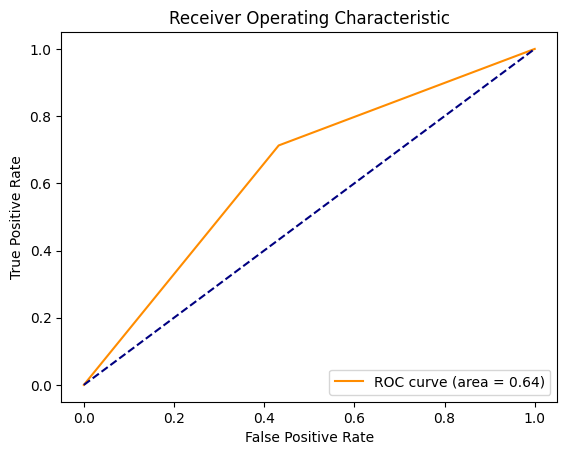

In [38]:
# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 4. Gaussian Naive Bayes Model

- Data Preprocessing

In [39]:
# Features list
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 
            'MACD_Fast', 'MACD_Signal', 'SMA', 'WEI', 'VIX', 'FFR', 
            'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year', 'Recession Prob', 
            'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper', 'Wheat', 'Natural_Gas', 
            'Corn', 'Cotton', 'Coffee', 'Sugar', 'Weekly Mean', 'Quarterly Mean', 
            'Annual Mean', 'Annual Weekly Mean', 'Annual Quarterly Mean', 'Weekly Trend', 
            'Daily Range', 'Daily Volatility', 'grossProfit', 'totalRevenue', 'costOfRevenue', 'costofGoodsAndServicesSold', 
            'operatingIncome', 'sellingGeneralAndAdministrative', 'researchAndDevelopment', 
            'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome', 'interestIncome', 
            'interestExpense', 'nonInterestIncome', 'otherNonOperatingIncome', 'depreciation', 
            'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense', 'interestAndDebtExpense', 
            'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome']

num_features = 20

In [40]:
# Use target column
target_column = ['Target']

 
# X should be all features
X = df[features]


# Y should be target
y = df[target_column].values.ravel()

In [41]:
# Define pipeline steps
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select_k_best', SelectKBest(score_func=mutual_info_classif, k=num_features)),
    ('gnb', GaussianNB())
])

# Define search space
param_distributions = {
    'select_k_best__k': np.arange(5, X.shape[1]),
    'gnb__var_smoothing': np.logspace(0,-9, num=100),
    'gnb__priors': [None, [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
}

# Create randomized search object
best_gnb = RandomizedSearchCV(pipe, param_distributions=param_distributions, n_iter=30, cv=5, verbose=1, random_state=42)

# Fit to the data
best_gnb.fit(X, y)

# Get the best parameters and features
best_params = best_gnb.best_params_
best_features = np.array(features)[best_gnb.best_estimator_.named_steps['select_k_best'].get_support()]

print("Best Parameters:", best_params)
print("Best Features:", best_features)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'select_k_best__k': 42, 'gnb__var_smoothing': 0.8111308307896871, 'gnb__priors': [0.5, 0.5]}
Best Features: ['High' 'Open' 'MACD_Fast' 'MACD_Signal' 'VIX' 'Recession Prob'
 'Crude_Oil_WTI' 'Gold' 'Silver' 'Copper' 'Natural_Gas' 'Cotton' 'Coffee'
 'Sugar' 'Weekly Mean' 'Quarterly Mean' 'Annual Mean'
 'Annual Quarterly Mean' 'Weekly Trend' 'grossProfit' 'costOfRevenue'
 'costofGoodsAndServicesSold' 'operatingIncome'
 'sellingGeneralAndAdministrative' 'researchAndDevelopment'
 'operatingExpenses' 'investmentIncomeNet' 'netInterestIncome'
 'interestIncome' 'interestExpense' 'nonInterestIncome'
 'otherNonOperatingIncome' 'depreciation' 'depreciationAndAmortization'
 'incomeBeforeTax' 'incomeTaxExpense' 'interestAndDebtExpense'
 'netIncomeFromContinuingOperations' 'comprehensiveIncomeNetOfTax' 'ebit'
 'ebitda' 'netIncome']


In [42]:
X = df[best_features]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define hyperparameters to tune and use GridSearchCV to find the best ones for SVC model.
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test_scaled)

(6853, 42)


- Cross-Validation

In [43]:
# Evaluate the model using cross-validation
cross_val_accuracy = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_accuracy)
print("Mean Cross-Validation Accuracy Score:", cross_val_accuracy.mean())
print("Cross-Validation Accuracy Variance:", cross_val_accuracy.var())

Cross-Validation Accuracy Scores: [0.52512156 0.53484603 0.49959448 0.52311436 0.48905109]
Mean Cross-Validation Accuracy Score: 0.514345504041348
Cross-Validation Accuracy Variance: 0.0002941374546092922


- Evaluation<br>
Precision, Recall, and F1-Score

In [44]:
# Generating and printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.48      0.45      0.46       305
         1.0       0.58      0.61      0.60       381

    accuracy                           0.54       686
   macro avg       0.53      0.53      0.53       686
weighted avg       0.54      0.54      0.54       686



Confusion Matrix

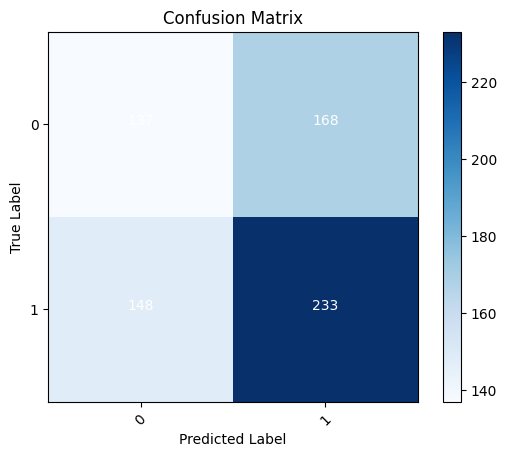

In [45]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Annotate the plot with the actual numbers
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

ROC-AUC Curve

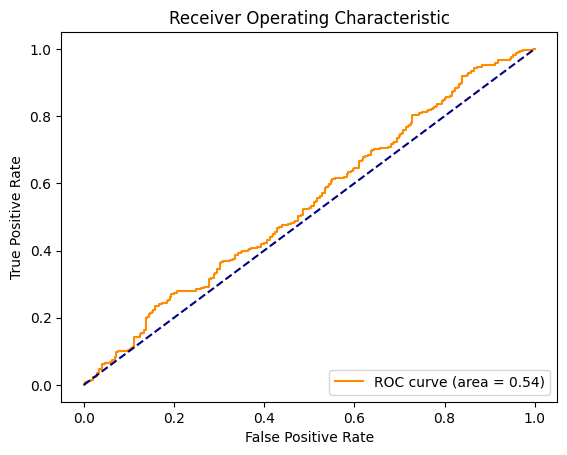

In [46]:
# Compute the probabilities of the positive class
y_prob = gnb.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 5. MLP

In [47]:
import warnings

warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv('final_merged_data_with_income.csv')

# List of feature columns
feature_columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'MACD_Fast', 'MACD_Signal',
                    'SMA', 'WEI', 'VIX', 'FFR', 'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year', 
                    'Recession Prob', 'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper', 'Wheat', 'Natural_Gas', 
                    'Corn', 'Cotton', 'Coffee', 'Sugar', 'Weekly Mean', 'Quarterly Mean', 'Annual Mean', 
                    'Annual Weekly Mean', 'Annual Quarterly Mean', 'Weekly Trend', 'Daily Range', 'Daily Volatility', 
                    'Mean Reported EPS', 'Mean Estimated EPS', 'grossProfit', 'totalRevenue', 'costOfRevenue',
                    'costofGoodsAndServicesSold', 'operatingIncome', 'sellingGeneralAndAdministrative', 
                    'researchAndDevelopment', 'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome', 
                    'interestIncome', 'interestExpense', 'nonInterestIncome', 'otherNonOperatingIncome', 
                    'depreciation', 'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense', 
                    'interestAndDebtExpense', 'netIncomeFromContinuingOperations', 'comprehensiveIncomeNetOfTax', 
                    'ebit', 'ebitda', 'netIncome'
                    ]


# Use target column
target_column = ['Target']

# X should be all features
X = data[feature_columns]

# Y should be target
y = data[target_column].values.ravel()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Create pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
                    ('select_k_best', SelectKBest(score_func=f_classif)),
                    ('mlp', MLPClassifier())
                    ])

# Create parameters 
# comment out parameters not being used to better runtime
parameters = {'select_k_best__k': np.arange(1, X.shape[1]),  
                        'mlp__hidden_layer_sizes': [
                        1000,
                        750,
                        700, 
                        ],
                        'mlp__activation': [
                            'relu', 
                            'tanh'
                        ],
                        'mlp__alpha': [
                            0.0001, 
                            0.001, 
                            0.01
                        ],
                        }

# Use RandomizedSearchCV for best parameters
random_search = RandomizedSearchCV(pipeline, parameters, n_iter=10, cv=5, scoring='accuracy', random_state=0)
random_search.fit(X_train_scaled, y_train)

# Get best parameters and best estimator
best_params = random_search.best_params_
best_mlp = random_search.best_estimator_

# Fit best estimator on training data
best_mlp.fit(X_train_scaled, y_train)

# Get the selected features
selected_features_indices = best_mlp.named_steps['select_k_best'].get_support()
best_features = X.columns[selected_features_indices]
predictions = best_mlp.predict(X_test_scaled)

# Print results
print("Best parameters:", best_params)
print("Best features:", best_features)
print("Accuracy score:", accuracy_score(y_test, predictions))

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://stackoverflow.com/questions/73057318/get-support-of-the-features-selected-in-gridsearch-cv
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html


Best parameters: {'select_k_best__k': 42, 'mlp__hidden_layer_sizes': 750, 'mlp__alpha': 0.001, 'mlp__activation': 'relu'}
Best features: Index(['RSI', 'VIX', 'FFR', 'UNEMPLOYMENT', 'CPI', 'Treasury 10-Year',
       'Recession Prob', 'Crude_Oil_WTI', 'Gold', 'Silver', 'Copper',
       'Natural_Gas', 'Corn', 'Cotton', 'Sugar', 'Weekly Mean',
       'Quarterly Mean', 'Annual Mean', 'Annual Weekly Mean',
       'Annual Quarterly Mean', 'Weekly Trend', 'Daily Range',
       'Daily Volatility', 'Mean Reported EPS', 'Mean Estimated EPS',
       'grossProfit', 'operatingIncome', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'interestIncome',
       'interestExpense', 'otherNonOperatingIncome',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')
Accuracy score: 0.7128279883381924


- Cross-Validation

In [49]:
# Make predictions on the test data
y_pred = best_mlp.predict(X_test_scaled)

# Evaluate the model using cross-validation
cross_val_accuracy = cross_val_score(best_mlp, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", cross_val_accuracy)
print("Mean Cross-Validation Accuracy Score:", cross_val_accuracy.mean())
print("Cross-Validation Accuracy Variance:", cross_val_accuracy.var())

Cross-Validation Accuracy Scores: [0.68421053 0.66450567 0.66612642 0.67666126 0.67747164]
Mean Cross-Validation Accuracy Score: 0.6737951036424124
Cross-Validation Accuracy Variance: 5.5063013789496866e-05


- Evaluation<br>
Precision, Recall, and F1-Score

In [52]:
# Generating and printing the classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.70      0.67      0.68       317
         1.0       0.73      0.75      0.74       369

    accuracy                           0.71       686
   macro avg       0.71      0.71      0.71       686
weighted avg       0.71      0.71      0.71       686



Confusion Matrix

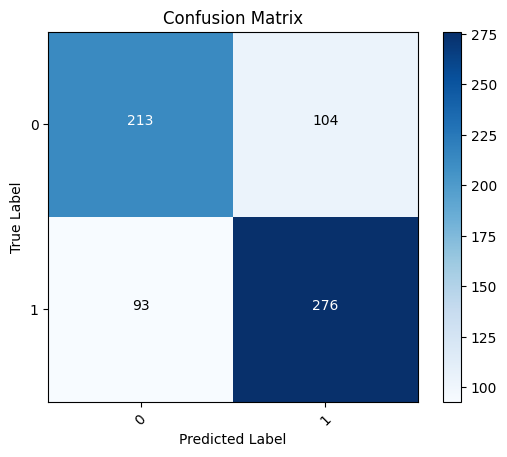

In [50]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['0', '1'], rotation=45)
plt.yticks(tick_marks, ['0', '1'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Annotate the plot with the actual numbers
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

Confusion Matrix

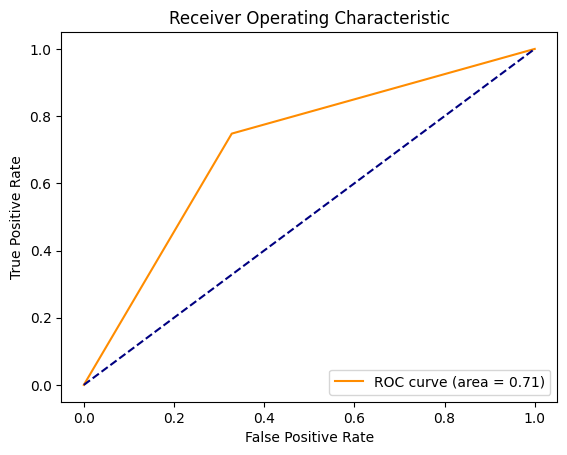

In [51]:
# Compute ROC curve and ROC AUC
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()